In [17]:
# %load ../graph.py
#!/usr/bin/env python

# In[1]:


import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import numpy as np

matplotlib.rc('font', family='AppleGothic')  # mac 은 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # - 기호 사용 가능

In [5]:
df = pd.read_excel('./dataset/남북한발전전력량.xlsx', convert_float = True)
df

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,NaN,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,NaN,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,NaN,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,NaN,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,NaN,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,NaN,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,NaN,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [7]:
df = df.loc[5:9]
df = df.drop('전력량 (억㎾h)', axis = 1)
df

,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
5,합계,277,263,247,221,231,230,213,193,170,...,236,255,235,237,211,215,221,216,190,239
6,수력,156,150,142,133,138,142,125,107,102,...,133,141,125,134,132,135,139,130,100,128
7,화력,121,113,105,88,93,88,88,86,68,...,103,114,110,103,79,80,82,86,90,111
8,원자력,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [12]:
df = df.set_index('발전 전력별')
df = df.T
df

발전 전력별,합계,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [13]:
df.rename(columns = {'합계' : '총발전량'}, inplace = True)
df

발전 전력별,총발전량,수력,화력,원자력
1990,277,156,121,-
1991,263,150,113,-
1992,247,142,105,-
1993,221,133,88,-
1994,231,138,93,-
1995,230,142,88,-
1996,213,125,88,-
1997,193,107,86,-
1998,170,102,68,-
1999,186,103,83,-


In [14]:
df['전년도발전량'] = df['총발전량'].shift(1)
df

발전 전력별,총발전량,수력,화력,원자력,전년도발전량
1990,277,156,121,-,NaN
1991,263,150,113,-,277
1992,247,142,105,-,263
1993,221,133,88,-,247
1994,231,138,93,-,221
1995,230,142,88,-,231
1996,213,125,88,-,230
1997,193,107,86,-,213
1998,170,102,68,-,193
1999,186,103,83,-,170


In [15]:
df['증감율'] = df['총발전량']-df['전년도발전량']
df

발전 전력별,총발전량,수력,화력,원자력,전년도발전량,증감율
1990,277,156,121,-,NaN,NaN
1991,263,150,113,-,277,-14
1992,247,142,105,-,263,-16
1993,221,133,88,-,247,-26
1994,231,138,93,-,221,10
1995,230,142,88,-,231,-1
1996,213,125,88,-,230,-17
1997,193,107,86,-,213,-20
1998,170,102,68,-,193,-23
1999,186,103,83,-,170,16


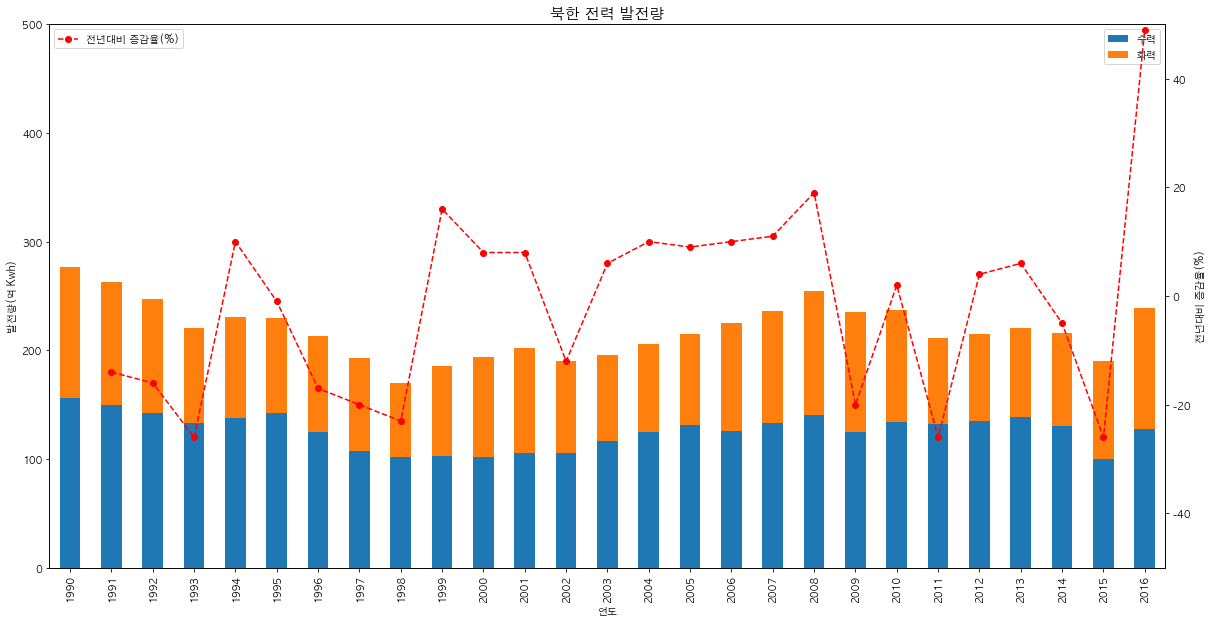

In [19]:
# 2개의 y축을 그리는 twin 그래프

ax1 = df[['수력','화력']].plot(kind = 'bar' , figsize = (20,10), stacked = True)
ax2 = ax1.twinx()
ax2.plot(df.index , df['증감율'], ls = '--', marker = 'o', color = 'red' , label = '전년대비 증감율(%)')
ax1.set_ylim(0,500)
ax2.set_ylim(-50, 50)
ax1.set_ylabel('발전량(억 Kwh)')
ax2.set_ylabel('전년대비 증감율(%)')
ax1.set_xlabel('연도')

plt.title('북한 전력 발전량', size = 15)
ax1.legend(loc = 'best')
ax2.legend(loc = 'best')

plt.show()